Stress the importance of noise
- gaussian noise
- uniform noise
- cauchy noise
- linear noise <br>
https://en.wikipedia.org/wiki/Noise_(signal_processing)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp

In [3]:
# Parameters
L = 10  # Lenght of the edge of the image
N = L**2 # Number of spins 
p = 10 # Number of patterns
MF = 0 # Use or not the Mean Field strategy: if MF=1 uses MF, if MF = 0 only spins at
# a distance R interacts
R = 3 # The 3-nearest neighbor interacts
np.random.seed(1234) # Seed to make the random process reproducible


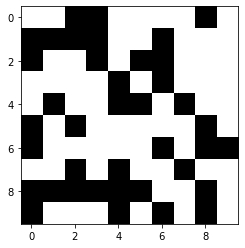

In [4]:
def rand_corrupted_patterns(N,p):
    yi = np.random.randint(-1,5,N*p).reshape(p,N)
    yi[yi==0] = -1
    yi[yi==3] =  1
    yi[yi==2] = -1
    yi[yi==4] = -1
    return yi
yi = rand_corrupted_patterns(N,p)
idy = np.random.randint(0,p)
plt.imshow(yi[idy].reshape(L,L),cmap='Greys')

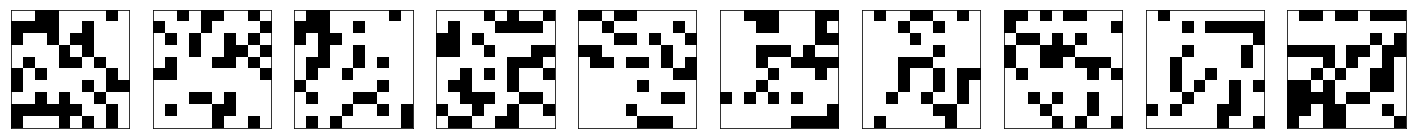

In [5]:
fig, ax = plt.subplots(1, p, figsize=(25, 25))   # Are we suppose to plot only one plot as above or 
                                                    #all plots as below for each pattern 
for i in range(p):
    ax[i].matshow(yi[i].reshape(L, L),  cmap='Greys')
    ax[i].set_xticks([])
    ax[i].set_yticks([])


In [6]:
J = np.zeros((L*L, L*L))
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        w = 0.0  
        for n in range(p):
             w += yi[n, i] * yi[n, j]
        J[i, j] = w / N
        J[i, i] = 0.0
        J[j, i] = J[i, j]  

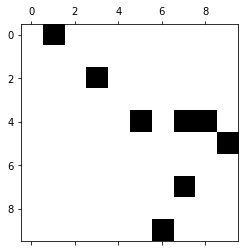

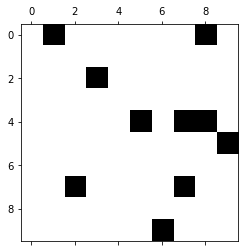

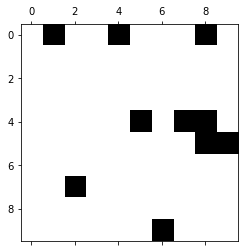

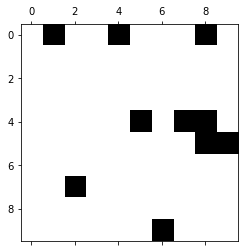

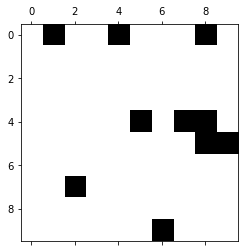

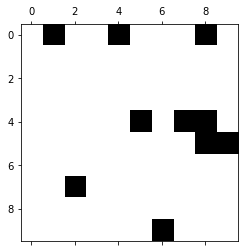

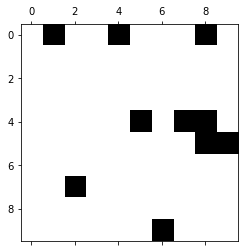

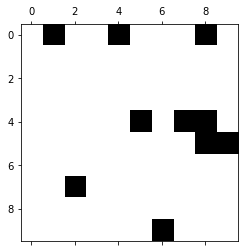

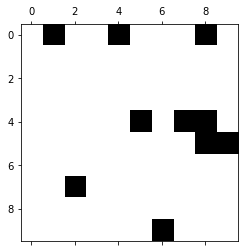

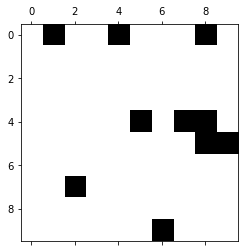

In [11]:
#updating one of the corrupted patterns yi[0]
h = np.zeros(N)
global yi
iterations = 10
distance = np.zeros((iterations,p)) 
for iteration in range(iterations):
    for i in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] += J[i, j]*yi[0][j]
        yi[0] = np.where(h<0, -1, 1)
    for i in range(p):
        distance[iteration, i] = ((p - yi[0])[i]!=0).sum()   
    fig, ax = plt.subplots()
    ax.matshow(yi[0].reshape((L, L)), cmap='gray')